# Инициализация

Загружаем библиотеки необходимые для выполнения кода ноутбука.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import sklearn.preprocessing

# === ЭТАП 1 ===

# Загрузка первичных данных

Загружаем первичные данные из файлов:
- tracks.parquet
- catalog_names.parquet
- interactions.parquet

In [3]:
tracks = pd.read_parquet('tracks.parquet')
catalog = pd.read_parquet('catalog_names.parquet')
interactions = pd.read_parquet('interactions.parquet')

# Обзор данных

Проверяем данные, есть ли с ними явные проблемы.

#### Tracks

In [10]:
tracks.head()

,track_id,albums,artists,genres
0,26,"[3, 2490753]",[16],"[11, 21]"
1,38,"[3, 2490753]",[16],"[11, 21]"
2,135,"[12, 214, 2490809]",[84],[11]
3,136,"[12, 214, 2490809]",[84],[11]
4,138,"[12, 214, 322, 72275, 72292, 91199, 213505, 24...",[84],[11]


In [9]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 4 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   track_id  1000000 non-null  int64 
 1   albums    1000000 non-null  object
 2   artists   1000000 non-null  object
 3   genres    1000000 non-null  object
dtypes: int64(1), object(3)
memory usage: 30.5+ MB


In [25]:
tracks.describe()

,track_id
count,1.000000e+06
mean,3.685121e+07
std,2.679771e+07
min,2.600000e+01
25%,1.543088e+07
50%,3.455047e+07
75%,5.692557e+07
max,1.015218e+08


#### Catalog

In [12]:
catalog.head()

,id,type,name
0,3,album,Taller Children
1,12,album,Wild Young Hearts
2,13,album,Lonesome Crow
3,17,album,Graffiti Soul
4,26,album,Blues Six Pack


In [13]:
catalog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1812471 entries, 0 to 1812470
Data columns (total 3 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   id      int64 
 1   type    object
 2   name    object
dtypes: int64(1), object(2)
memory usage: 41.5+ MB


In [24]:
catalog.describe()

,id
count,1.812471e+06
mean,2.321647e+07
std,2.526044e+07
min,0.000000e+00
25%,3.480524e+06
50%,1.211436e+07
75%,3.773817e+07
max,1.015218e+08


#### Interactions

In [14]:
interactions.head()

,user_id,track_id,track_seq,started_at
0,0,99262,1,2022-07-17
1,0,589498,2,2022-07-19
2,0,590262,3,2022-07-21
3,0,590303,4,2022-07-22
4,0,590692,5,2022-07-22


In [15]:
interactions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 222629898 entries, 0 to 291
Data columns (total 4 columns):
 #   Column      Dtype         
---  ------      -----         
 0   user_id     int32         
 1   track_id    int32         
 2   track_seq   int16         
 3   started_at  datetime64[ns]
dtypes: datetime64[ns](1), int16(1), int32(2)
memory usage: 5.4 GB


In [23]:
interactions.describe()

,user_id,track_id,track_seq,started_at
count,2.226299e+08,2.226299e+08,2.226299e+08,222629898
mean,6.875767e+05,3.653622e+07,4.621403e+02,2022-08-29 16:39:44.541336320
min,0.000000e+00,2.600000e+01,1.000000e+00,2022-01-01 00:00:00
25%,3.433710e+05,1.480849e+07,5.600000e+01,2022-07-02 00:00:00
50%,6.879730e+05,3.552474e+07,1.810000e+02,2022-09-15 00:00:00
75%,1.031127e+06,5.651137e+07,5.060000e+02,2022-11-09 00:00:00
max,1.374582e+06,1.015218e+08,1.663700e+04,2022-12-31 00:00:00
std,3.969033e+05,2.661782e+07,8.257312e+02,NaN


In [52]:
catalog['type'].value_counts()

type
track     1000000
album      658724
artist     153581
genre         166
Name: count, dtype: int64

In [4]:
# уникальные id альбомов, исполнителей и жанров в tracks
id_album_tracks = set([id for sublist in tracks['albums'] for id in sublist])
id_artist_tracks = set([id for sublist in tracks['artists'] for id in sublist])
id_genre_tracks = set([id for sublist in tracks['genres'] for id in sublist])

# уникальные id из catalog
id_album_cat = set(catalog[catalog['type'] == 'album']['id'])
id_artist_cat = set(catalog[catalog['type'] == 'artist']['id'])
id_genre_cat = set(catalog[catalog['type'] == 'genre']['id'])

# неизвестные id альбомов, исполнителей и жанров в tracks
unknown_id_album = id_album_tracks - id_album_cat
unknown_id_artist = id_artist_tracks - id_artist_cat
unknown_id_genre = id_genre_tracks - id_genre_cat

print('Неизвестные id альбомов: ', unknown_id_album)
print('Неизвестные id исполнителей: ', unknown_id_artist)
print('Неизвестные id жанров: ', unknown_id_genre)

Неизвестные id альбомов:  set()
Неизвестные id исполнителей:  set()
Неизвестные id жанров:  {130, 131, 132, 133, 134, 135, 146, 148, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 124, 126}


In [10]:
# количество неизвестных жанров
len(unknown_id_genre)

30

In [5]:
# добавляем неизвестные жанры в каталог
rows = []

for i in unknown_id_genre:
    d = {'id': i,
        'type': "genre",
        'name': "unknown"}
    rows.append(d)

unk_genre = pd.DataFrame(rows)
catalog = pd.concat([catalog, unk_genre], ignore_index=True)

In [6]:
catalog.to_parquet('catalogs_add.parquet', index=False)

# Выводы

Приведём выводы по первому знакомству с данными:
- есть ли с данными явные проблемы,
- какие корректирующие действия (в целом) были предприняты.


В данных пропусков нет. Тип данных соответствует каждому признаку. Заметил, что слишком много использовано памяти в таблице interactions: memory usage: 5.4 GB по сравнению с другими таблицами. 

Неизвестных id альбомов и исполнителей нет, но есть неизвестные id жанров, их количество 30, добавил их в каталог с названиями "unknown", мало ли в дальнейшем пригодятся.

# === ЭТАП 2 ===

# EDA

Распределение количества прослушанных треков.

In [12]:
interactions

,user_id,track_id,track_seq,started_at
0,0,99262,1,2022-07-17
1,0,589498,2,2022-07-19
2,0,590262,3,2022-07-21
3,0,590303,4,2022-07-22
4,0,590692,5,2022-07-22
...,...,...,...,...
287,1374582,95514767,288,2022-12-29
288,1374582,97220301,289,2022-12-29
289,1374582,97241171,290,2022-12-29
290,1374582,98542641,291,2022-12-29


        track_id   count
0          53404  111062
1       33311009  106921
2         178529  101924
3       35505245   99490
4       65851540   86670
...          ...     ...
999995  84391078       5
999996  84391079       5
999997  84391080       5
999998  34766819       5
999999  34766901       5

[1000000 rows x 2 columns]


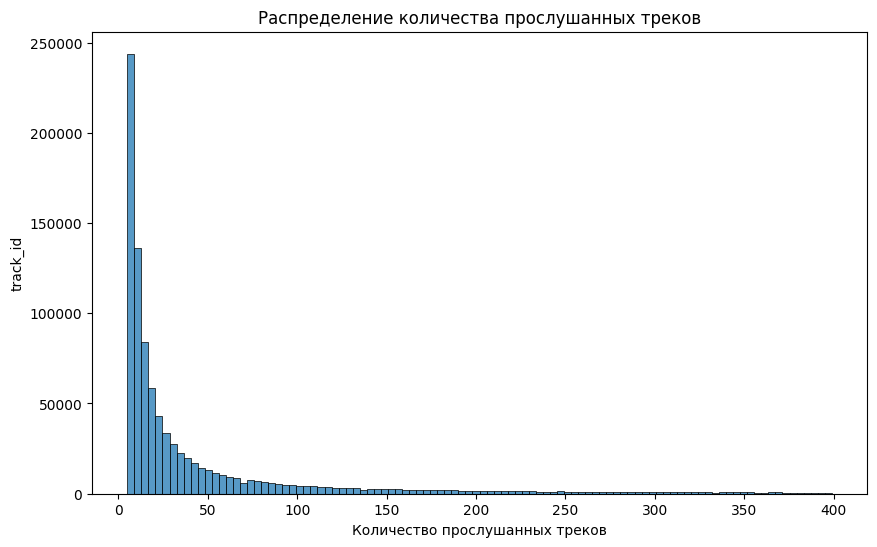

In [7]:
count_distribution = interactions.groupby('track_id').size().sort_values(ascending=False).reset_index(name='count')
print(count_distribution)

fig, axs = plt.subplots(1, 1, figsize=(10, 6))
sns.histplot(count_distribution.query("count < 400"), x='count', bins=100)

plt.title("Распределение количества прослушанных треков")
plt.xlabel("Количество прослушанных треков")
plt.ylabel("track_id")
plt.show()

In [87]:
count_distribution.to_parquet('data/count_distribution.parquet')

Наиболее популярные треки

                      name   count
0  Smells Like Teen Spirit  111062
1                 Believer  106921
2                     Numb  101924
3               I Got Love   99490
4                   Юность   86670
5           Way Down We Go   86246
6             Shape of You   85886
7               In The End   85244
8        Shape Of My Heart   85042
9                     Life   84748


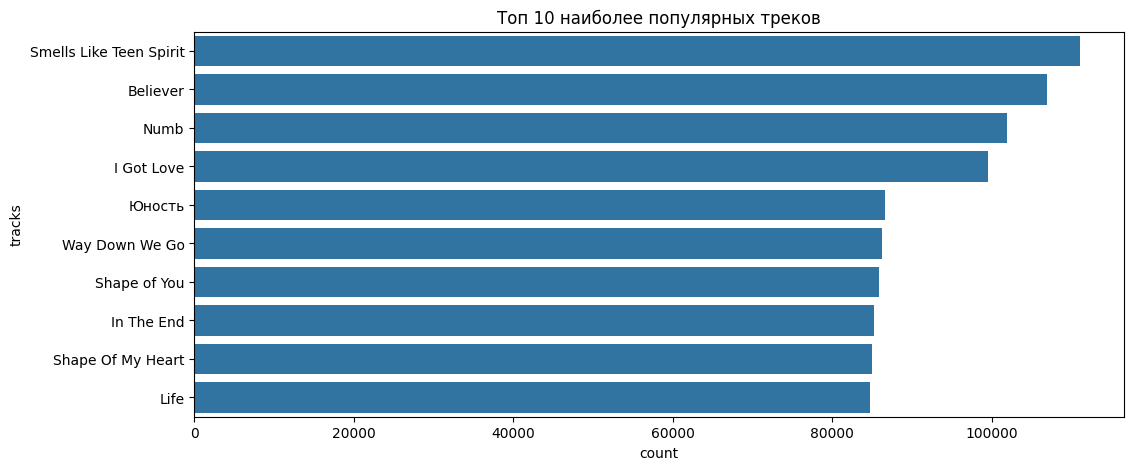

In [8]:
catalog_tracks = catalog[catalog['type'] == 'track']
popular_tracks = catalog_tracks.merge(count_distribution, left_on='id', right_on='track_id')
popular_tracks = popular_tracks.sort_values('count', ascending=False).reset_index(drop=True)
popular_tracks_top10 = popular_tracks.head(10)
print(popular_tracks_top10[['name','count']])

fig, axs = plt.subplots(1, 1, figsize=(12, 5))
sns.barplot(popular_tracks_top10, x='count', y='name')

plt.title("Топ 10 наиболее популярных треков")
plt.ylabel("tracks")
plt.show()

In [9]:
popular_tracks.to_parquet('data/popular_tracks.parquet')

Наиболее популярные жанры

In [28]:
popular_genres = count_distribution.merge(tracks[['track_id','genres']], on='track_id', how='left')
popular_genres

,track_id,count,genres
0,53404,111062,"[13, 14, 102]"
1,33311009,106921,"[14, 102]"
2,178529,101924,"[41, 47]"
3,35505245,99490,"[3, 75]"
4,65851540,86670,"[11, 20]"
...,...,...,...
999995,84391078,5,[62]
999996,84391079,5,[62]
999997,84391080,5,[62]
999998,34766819,5,[13]


In [29]:
popular_genres_exp = popular_genres.explode('genres')
popular_genres_exp = popular_genres_exp.groupby('genres')['count'].sum().reset_index()
popular_genres_exp = popular_genres_exp.sort_values(by='count', ascending=False).reset_index(drop=True)
popular_genres_exp

,genres,count
0,11,55578312
1,75,37799821
2,102,31092013
3,20,26626241
4,3,25303695
...,...,...
168,166,207
169,106,61
170,148,54
171,150,30


          name     count
0          pop  55578312
1          rap  37799821
2      allrock  31092013
3       ruspop  26626241
4       rusrap  25303695
5  electronics  20120981
6        dance  16291557
7      rusrock  13166147
8         rock  12772644
9        metal  12437375


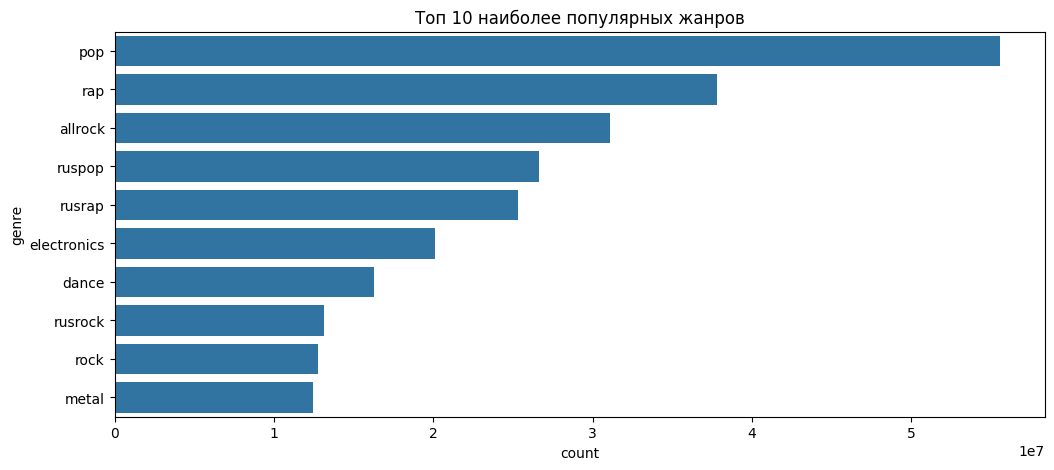

In [30]:
# объединил названия жанров с количеством жанров
name_genre = catalog[catalog['type'] == 'genre']
popular_genres_exp = popular_genres_exp.merge(name_genre, left_on='genres', right_on='id')
popular_genres_top10 = popular_genres_exp.head(10)
print(popular_genres_top10[['name','count']])

fig, axs = plt.subplots(1, 1, figsize=(12, 5))
sns.barplot(popular_genres_top10, x='count', y='name')

plt.title("Топ 10 наиболее популярных жанров")
plt.ylabel("genre")
plt.show()


In [32]:
popular_genres_exp.to_parquet('data/popular_genres.parquet')

Треки, которые никто не прослушал

In [19]:
id_tracks = set(tracks['track_id'])
id_tracks_inter = set(interactions['track_id'])
difference_tracks = id_tracks - id_tracks_inter
print("Треки, которые никто не прослушал: ", len(difference_tracks))

Треки, которые никто не прослушал:  0


### Вывод:

1. Большинство треков слушали по 50 раз;
2. Самые популярные треки: 
- Smells Like Teen Spirit (111062),
- Believer (106921), 
- Numb  (101924),
- I Got Love  (99490)
3. Самый популярный жанр, прослушанных треков, это pop (55578312), далее rap  (37799821) и allrock (31092013)
4. Треков, которые никто не слушал 0

# Преобразование данных

Преобразуем данные в формат, более пригодный для дальнейшего использования в расчётах рекомендаций.

# Сохранение данных

Сохраним данные в двух файлах в персональном S3-бакете по пути `recsys/data/`:
- `items.parquet` — все данные о музыкальных треках,
- `events.parquet` — все данные о взаимодействиях.

In [11]:
tracks.to_parquet('recsys/data/items.parquet', index=False)

NameError: name 'tracks' is not defined

In [34]:
interactions.to_parquet('recsys/data/events.parquet', index=False)

In [ ]:
del tracks
del catalog
del interactions

# Очистка памяти

Здесь, может понадобится очистка памяти для высвобождения ресурсов для выполнения кода ниже. 

Приведите соответствующие код, комментарии, например:
- код для удаление более ненужных переменных,
- комментарий, что следует перезапустить kernel, выполнить такие-то начальные секции и продолжить с этапа 3.

# === ЭТАП 3 ===

# Загрузка данных

Если необходимо, то загружаем items.parquet, events.parquet.

In [12]:
items = pd.read_parquet('recsys/data/items.parquet')
events = pd.read_parquet('recsys/data/events.parquet')

# Разбиение данных

Разбиваем данные на тренировочную, тестовую выборки.

In [3]:
events

,user_id,track_id,track_seq,started_at
0,0,99262,1,2022-07-17
1,0,589498,2,2022-07-19
2,0,590262,3,2022-07-21
3,0,590303,4,2022-07-22
4,0,590692,5,2022-07-22
...,...,...,...,...
222629893,1374582,95514767,288,2022-12-29
222629894,1374582,97220301,289,2022-12-29
222629895,1374582,97241171,290,2022-12-29
222629896,1374582,98542641,291,2022-12-29


In [13]:
# зададим точку разбиения
train_test_global_time_split_date = pd.to_datetime("2022-12-16")

train_test_global_time_split_idx = events["started_at"] < train_test_global_time_split_date
events_train = events[train_test_global_time_split_idx]
events_test = events[~train_test_global_time_split_idx]

# Топ популярных

Рассчитаем рекомендации как топ популярных.

In [14]:
events_train_popular = events_train.groupby('track_id')['user_id'].count().reset_index().sort_values('user_id', ascending=False).head(100)
events_train_popular.rename(columns={'user_id':'count'}, inplace=True)
events_train_popular

,track_id,count
9098,53404,110026
483876,33311009,101076
26665,178529,100866
512157,35505245,95523
368072,24692821,84153
...,...,...
849893,68562711,47588
904051,75944934,47536
902657,75642961,47438
423054,29175370,47320


In [32]:
events_train_popular.to_parquet('recsys/recomendations/top_popular.parquet')

# Персональные

Рассчитаем персональные рекомендации.

In [15]:
events_train['target'] = 1
events_test['target'] = 1

/tmp/ipykernel_120416/3539838709.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_train['target'] = 1
/tmp/ipykernel_120416/3539838709.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_test['target'] = 1


In [16]:
# перекодируем идентификаторы пользователей: 
# из имеющихся в последовательность 0, 1, 2, ...
user_encoder = sklearn.preprocessing.LabelEncoder()
user_encoder.fit(events["user_id"])
events_train["user_id_enc"] = user_encoder.transform(events_train["user_id"])
events_test["user_id_enc"] = user_encoder.transform(events_test["user_id"])

# перекодируем идентификаторы объектов: 
# из имеющихся в последовательность 0, 1, 2, ...
item_encoder = sklearn.preprocessing.LabelEncoder()
item_encoder.fit(items["track_id"])
items["item_id_enc"] = item_encoder.transform(items["track_id"])
events_train["track_id_enc"] = item_encoder.transform(events_train["track_id"])
events_test["track_id_enc"] = item_encoder.transform(events_test["track_id"])

/tmp/ipykernel_120416/988573000.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_train["user_id_enc"] = user_encoder.transform(events_train["user_id"])
/tmp/ipykernel_120416/988573000.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_test["user_id_enc"] = user_encoder.transform(events_test["user_id"])
/tmp/ipykernel_120416/988573000.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

In [7]:
# создаём sparse-матрицу формата CSR 
user_item_matrix_train = scipy.sparse.csr_matrix((
    events_train["target"],
    (events_train['user_id_enc'], events_train['track_id_enc'])),
    dtype=np.int8)

In [8]:
from implicit.als import AlternatingLeastSquares

als_model = AlternatingLeastSquares(factors=10, iterations=10, regularization=0.05, random_state=0)
als_model.fit(user_item_matrix_train)

/home/mle-user/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/mle-user/.local/lib/python3.10/site-packages/implicit/cpu/als.py:95: RuntimeWarning: OpenBLAS is configured to use 4 threads. It is highly recommended to disable its internal threadpool by setting the environment variable 'OPENBLAS_NUM_THREADS=1' or by calling 'threadpoolctl.threadpool_limits(1, "blas")'. Having OpenBLAS use a threadpool can lead to severe performance issues here.
  check_blas_config()
100%|██████████| 10/10 [08:06<00:00, 48.69s/it]


In [9]:
def get_recommendations_als(user_item_matrix, model, user_id, user_encoder, item_encoder, include_seen=False, n=5):
    """
    Возвращает отранжированные рекомендации для заданного пользователя
    """
    user_id_enc = user_encoder.transform([user_id])[0]
    recommendations = model.recommend(
         user_id_enc, 
         user_item_matrix[user_id_enc], 
         filter_already_liked_items =not include_seen,
         N=n)
    recommendations = pd.DataFrame({"item_id_enc": recommendations[0], "score": recommendations[1]})
    recommendations["item_id"] = item_encoder.inverse_transform(recommendations["item_id_enc"])
    
    return recommendations

In [13]:
items

,track_id,albums,artists,genres,item_id_enc
0,26,"[3, 2490753]",[16],"[11, 21]",0
1,38,"[3, 2490753]",[16],"[11, 21]",1
2,135,"[12, 214, 2490809]",[84],[11],2
3,136,"[12, 214, 2490809]",[84],[11],3
4,138,"[12, 214, 322, 72275, 72292, 91199, 213505, 24...",[84],[11],4
...,...,...,...,...,...
999995,101478482,[21399811],[5540395],"[3, 75]",999995
999996,101490148,[21403052],[9078726],"[11, 20]",999996
999997,101493057,[21403883],[11865715],"[44, 75]",999997
999998,101495927,[21404975],[4462686],"[3, 75]",999998


In [10]:
# Выбор произвольного пользователя из тренировочной выборки
user_id = events_train['user_id'].sample().iat[0]

print(f"user_id: {user_id}")

print("История (последние события, recent)")
user_history = (
    events_train
    .query("user_id == @user_id")
    .merge(items.set_index("track_id")[["artists", "genres"]], on="track_id")
)
user_history_to_print = user_history.tail(10)
display(user_history_to_print)

print("Рекомендации")
user_recommendations = get_recommendations_als(user_item_matrix_train, als_model, user_id, user_encoder, item_encoder, include_seen=False, n=5)
user_recommendations = user_recommendations.merge(items, left_on="item_id", right_on="track_id")
display(user_recommendations)

user_id: 176368
История (последние события, recent)


,user_id,track_id,track_seq,started_at,target,user_id_enc,track_id_enc,artists,genres
695,176368,57363691,696,2022-11-30,1,176204,753651,"[12741, 34756, 307558, 124255, 439726]","[44, 75]"
696,176368,57363752,697,2022-11-30,1,176204,753658,[12741],"[44, 75]"
697,176368,57897457,698,2022-11-30,1,176204,757423,[930335],[16]
698,176368,57925627,699,2022-11-30,1,176204,757700,"[4465783, 5734930]","[3, 75]"
699,176368,58076419,700,2022-12-01,1,176204,758981,[7172945],[16]
700,176368,58515506,701,2022-12-01,1,176204,762876,[6229247],"[11, 20]"
701,176368,58535495,702,2022-12-01,1,176204,763046,"[753511, 5090577]","[68, 101]"
702,176368,58580407,703,2022-12-03,1,176204,763529,[3176637],[21]
703,176368,58893328,704,2022-12-03,1,176204,766228,[1404],"[47, 308]"
704,176368,59335991,705,2022-12-04,1,176204,770810,[5608856],"[3, 75]"


Рекомендации


,item_id_enc_x,score,item_id,track_id,albums,artists,genres,item_id_enc_y
0,696106,0.372267,51241318,51241318,"[5239478, 13040087, 13131618, 15177310, 154524...","[1802873, 3135644, 9012818]",[74],696106
1,579622,0.364920,39946957,39946957,[5172410],[5007577],"[11, 20]",579622
2,630282,0.354249,43942453,43942453,[5871523],[3706671],"[6, 70]",630282
3,600281,0.316846,41667460,41667460,"[5472076, 5855106, 5855188, 5887536, 7152451, ...",[4084181],[16],600281
4,572585,0.272290,39307896,39307896,"[5070382, 18407283]",[5129397],"[3, 75]",572585


In [11]:
# получаем список всех возможных user_id (перекодированных)
user_ids_encoded = range(len(user_encoder.classes_))
user_ids_encoded

range(0, 1373221)

In [12]:
# создаём test sparse-матрицу формата CSR 
user_item_matrix_test = scipy.sparse.csr_matrix((
    events_test["target"],
    (events_test['user_id_enc'], events_test['track_id_enc'])),
    dtype=np.int8)

In [13]:
# получаем рекомендации для всех пользователей
als_recommendations = als_model.recommend(
    user_ids_encoded, 
    user_item_matrix_test[user_ids_encoded], 
    filter_already_liked_items=False, N=10)

In [14]:
# преобразуем полученные рекомендации в табличный формат
item_ids_enc = als_recommendations[0]
als_scores = als_recommendations[1]

als_recommendations = pd.DataFrame({
    "user_id_enc": user_ids_encoded,
    "item_id_enc": item_ids_enc.tolist(), 
    "score": als_scores.tolist()})
als_recommendations = als_recommendations.explode(["item_id_enc", "score"], ignore_index=True)

# приводим типы данных
als_recommendations["item_id_enc"] = als_recommendations["item_id_enc"].astype("int")
als_recommendations["score"] = als_recommendations["score"].astype("float")

# получаем изначальные идентификаторы
als_recommendations["user_id"] = user_encoder.inverse_transform(als_recommendations["user_id_enc"])
als_recommendations["item_id"] = item_encoder.inverse_transform(als_recommendations["item_id_enc"])
als_recommendations = als_recommendations.drop(columns=["user_id_enc", "item_id_enc"])

In [15]:
als_recommendations = als_recommendations[["user_id", "item_id", "score"]]
als_recommendations = als_recommendations.sort_values(by = "score", ascending=False)
als_recommendations.to_parquet("recsys/recomendations/personal_als.parquet") 

In [18]:
als_recommendations

,user_id,item_id,score
11563130,1157457,35505245,3.830857
10540400,1055078,178529,3.809782
1269210,127037,35505245,3.684105
10540401,1055078,53404,3.653688
11996980,1200889,33311009,3.629589
...,...,...,...
10110745,1012069,138,0.000000
10110744,1012069,139,0.000000
10110743,1012069,140,0.000000
4776845,478155,138,0.000000


# Похожие

Рассчитаем похожие, они позже пригодятся для онлайн-рекомендаций.

In [19]:
# получим энкодированные идентификаторы всех объектов, известных нам из events_train
train_item_ids_enc = events_train['track_id_enc'].unique()

max_similar_items = 10


similar_items = als_model.similar_items(train_item_ids_enc, N=max_similar_items+1)

# преобразуем полученные списки в табличный формат
sim_item_item_ids_enc = similar_items[0]
sim_item_scores = similar_items[1]

similar_items = pd.DataFrame({
    "track_id_enc": train_item_ids_enc,
    "sim_item_id_enc": sim_item_item_ids_enc.tolist(), 
    "score": sim_item_scores.tolist()})
similar_items = similar_items.sort_values('score')

In [21]:
similar_items

,track_id_enc,sim_item_id_enc,score
972732,221963,"[221963, 218454, 219907, 545736, 218462, 72342...","[0.9999996423721313, 0.9502559900283813, 0.949..."
339403,824853,"[824853, 748824, 677732, 707388, 734416, 73770...","[0.9999996423721313, 0.9554610252380371, 0.948..."
805502,682204,"[682204, 662290, 996729, 786407, 679907, 78119...","[0.9999996423721313, 0.9613125324249268, 0.960..."
900173,936769,"[936769, 803411, 936767, 954906, 690588, 10008...","[0.9999996423721313, 0.9628121256828308, 0.961..."
979063,953721,"[953721, 113, 953720, 677695, 999202, 953718, ...","[0.9999996423721313, 0.9748285412788391, 0.972..."
...,...,...,...
434888,665540,"[665540, 684038, 665587, 665557, 665529, 66552...","[1.0000003576278687, 1.000000238418579, 1.0000..."
718704,683409,"[683409, 683424, 683419, 683418, 683416, 68341...","[1.0000003576278687, 1.000000238418579, 1.0000..."
718719,683426,"[683426, 683419, 683418, 683416, 683415, 68341...","[1.0000003576278687, 1.000000238418579, 1.0000..."
849053,843579,"[843579, 843597, 843596, 843589, 843588, 84358...","[1.0000003576278687, 1.000000238418579, 1.0000..."


In [20]:
similar_items.to_parquet("recsys/recomendations/similar_items.parquet")

In [17]:
similar_items = pd.read_parquet("recsys/recomendations/similar_items.parquet")

# Построение признаков

Построим три признака, можно больше, для ранжирующей модели.

In [18]:
popular_genres = pd.read_parquet("data/popular_genres.parquet")

In [24]:
popular_genres

,genres,count,id,type,name
0,11,55578312,11,genre,pop
1,75,37799821,75,genre,rap
2,102,31092013,102,genre,allrock
3,20,26626241,20,genre,ruspop
4,3,25303695,3,genre,rusrap
...,...,...,...,...,...
168,166,207,166,genre,unknown
169,106,61,106,genre,technologies
170,148,54,148,genre,unknown
171,150,30,150,genre,unknown


#### Первый признак: максимальная популярность каждого трека

In [19]:
# Создание словаря из popular_genres
genre_popularity = dict(zip(popular_genres['id'], popular_genres['count']))

# Поиск максимальной популярности жанра для трека
def max_genre_popular(genres, genre_popularity):
    if len(genres) == 0:  # Если список жанров пуст
        return 0
    return max([genre_popularity.get(genre, 0) for genre in genres])

items['genre_popular'] = items['genres'].apply(lambda x: max_genre_popular(x, genre_popularity))

In [20]:
items.head()

,track_id,albums,artists,genres,item_id_enc,genre_popular
0,26,"[3, 2490753]",[16],"[11, 21]",0,55578312
1,38,"[3, 2490753]",[16],"[11, 21]",1,55578312
2,135,"[12, 214, 2490809]",[84],[11],2,55578312
3,136,"[12, 214, 2490809]",[84],[11],3,55578312
4,138,"[12, 214, 322, 72275, 72292, 91199, 213505, 24...",[84],[11],4,55578312


#### Второй признак: количество альбомов, в которые вошел трек

In [21]:
items['album_count'] = items['albums'].apply(len)
items.head()

,track_id,albums,artists,genres,item_id_enc,genre_popular,album_count
0,26,"[3, 2490753]",[16],"[11, 21]",0,55578312,2
1,38,"[3, 2490753]",[16],"[11, 21]",1,55578312,2
2,135,"[12, 214, 2490809]",[84],[11],2,55578312,3
3,136,"[12, 214, 2490809]",[84],[11],3,55578312,3
4,138,"[12, 214, 322, 72275, 72292, 91199, 213505, 24...",[84],[11],4,55578312,10


#### Третий признак: количество каждого прослушивания трека

In [22]:
popular_tracks = pd.read_parquet("data/popular_tracks.parquet")

In [23]:
items = items.merge(popular_tracks[['id', 'count']], left_on='track_id', right_on='id')
items

,track_id,albums,artists,genres,item_id_enc,genre_popular,album_count,id,count
0,26,"[3, 2490753]",[16],"[11, 21]",0,55578312,2,26,5
1,38,"[3, 2490753]",[16],"[11, 21]",1,55578312,2,38,8
2,135,"[12, 214, 2490809]",[84],[11],2,55578312,3,135,16
3,136,"[12, 214, 2490809]",[84],[11],3,55578312,3,136,7
4,138,"[12, 214, 322, 72275, 72292, 91199, 213505, 24...",[84],[11],4,55578312,10,138,17
...,...,...,...,...,...,...,...,...,...
999995,101478482,[21399811],[5540395],"[3, 75]",999995,37799821,1,101478482,6
999996,101490148,[21403052],[9078726],"[11, 20]",999996,55578312,1,101490148,72
999997,101493057,[21403883],[11865715],"[44, 75]",999997,37799821,1,101493057,9
999998,101495927,[21404975],[4462686],"[3, 75]",999998,37799821,1,101495927,20


# Ранжирование рекомендаций

Построим ранжирующую модель, чтобы сделать рекомендации более точными. Отранжируем рекомендации.

In [31]:
als_recommendations = pd.read_parquet("recsys/recomendations/personal_als.parquet")
als_recommendations

,user_id,item_id,score
11563130,1157457,35505245,3.830857
10540400,1055078,178529,3.809782
1269210,127037,35505245,3.684105
10540401,1055078,53404,3.653688
11996980,1200889,33311009,3.629589
...,...,...,...
10110745,1012069,138,0.000000
10110744,1012069,139,0.000000
10110743,1012069,140,0.000000
4776845,478155,138,0.000000


In [29]:
items = items.rename(columns={'count':'count_listen'})
items.head()

,track_id,albums,artists,genres,item_id_enc,genre_popular,album_count,id,count_listen
0,26,"[3, 2490753]",[16],"[11, 21]",0,55578312,2,26,5
1,38,"[3, 2490753]",[16],"[11, 21]",1,55578312,2,38,8
2,135,"[12, 214, 2490809]",[84],[11],2,55578312,3,135,16
3,136,"[12, 214, 2490809]",[84],[11],3,55578312,3,136,7
4,138,"[12, 214, 322, 72275, 72292, 91199, 213505, 24...",[84],[11],4,55578312,10,138,17


In [33]:
items = items.merge(als_recommendations, left_on='track_id', right_on='item_id')

In [ ]:
features = ['genre_popular', 'album_count', 'count_listen', 'als_score']
target = 'target'

candidates_for_train = events_train_final[features + [target]]
candidates_for_val = interactions_valid_final[features + [target]]
candidates_for_test = interactions_test[features + [target]]

# Оценка качества

Проверим оценку качества трёх типов рекомендаций: 

- топ популярных,
- персональных, полученных при помощи ALS,
- итоговых
  
по четырем метрикам: recall, precision, coverage, novelty.

# === Выводы, метрики ===

Основные выводы при работе над расчётом рекомендаций, рассчитанные метрики.